In [2]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [3]:
def plot_setup():
    plt.figure(figsize=(10,3.5),dpi=150)
    plt.yticks(fontsize=7)
    plt.xticks(fontsize=7)
titlefont={"fontsize":10, "fontweight":"bold"}

## Time amplified Radioactive Decay:
$ \dot{N} = -aN(t)t$ or

$$ \frac{\mathrm{d}N}{\mathrm{d}t} = f(t,y) = -a*N(t)*t$$

Analytical solution: $ N(t)=N_0 \exp(-t^2a/2)$

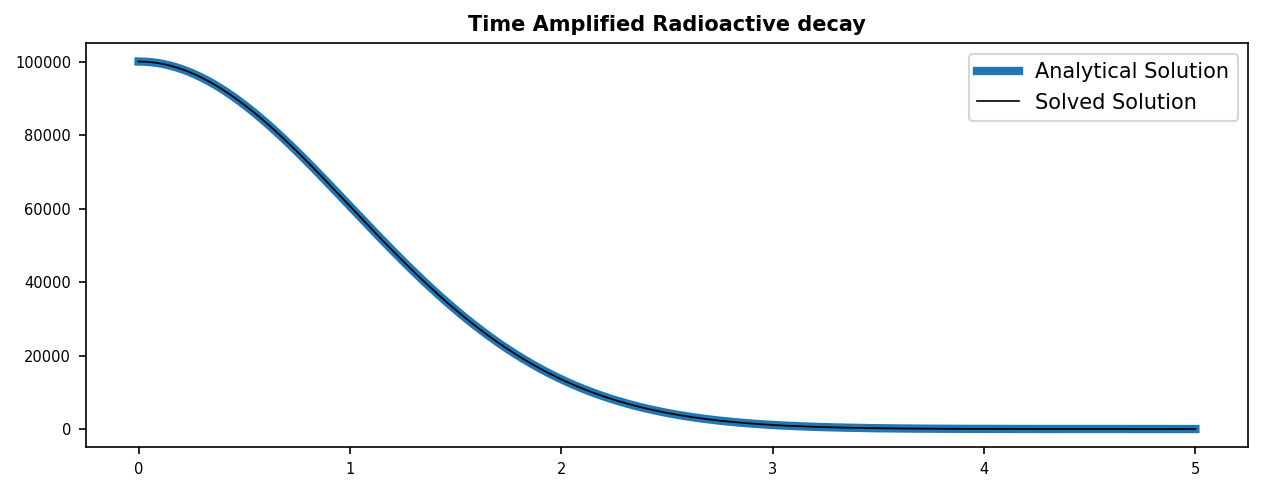

In [4]:
n0=1e5
a=1

def f_ODE(t,n,a=a):
    return -a* n*t

def anl_solution(t,a,n0):
    return n0*np.exp(-a*(t**2)/2)
plot_setup()

tlist=np.linspace(0,5,500)
solved_n=integrate.solve_ivp(f_ODE,[0,5],[n0],t_eval=tlist,method="RK45")


plt.plot(tlist,anl_solution(tlist,a=a,n0=n0),label="Analytical Solution",linewidth=4)
plt.plot(solved_n.t,solved_n.y[0],label="Solved Solution",color="black",linewidth=0.8)
plt.title("Time Amplified Radioactive decay", fontdict= titlefont)
plt.legend()
plt.show()

## Free Fall:

Text(0, 0.5, 'Y')

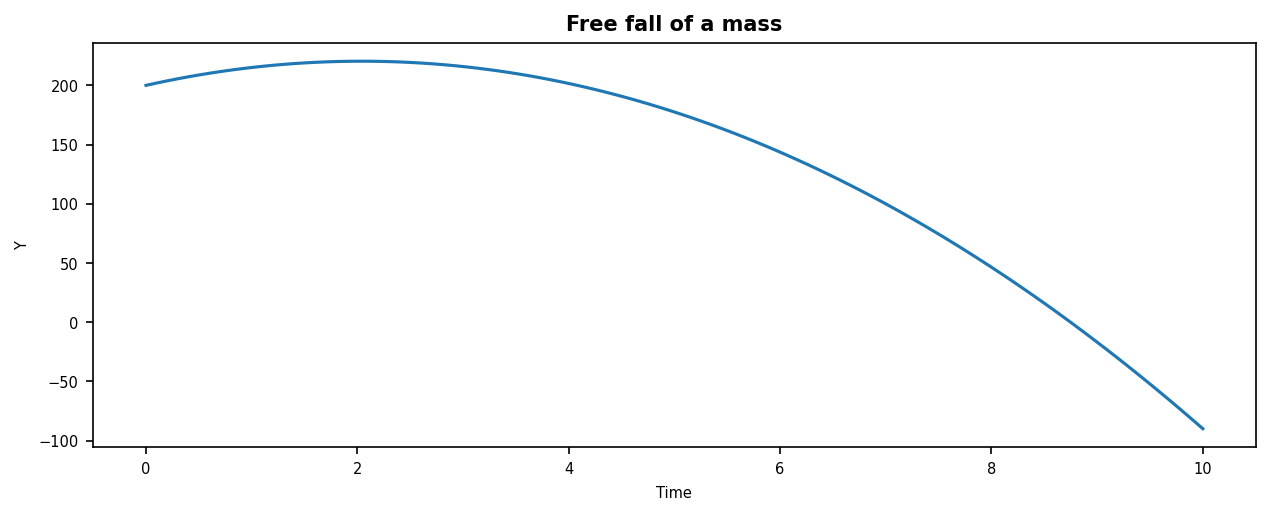

In [28]:
def free_fall(t,Y):
    y, v =Y
    return [v, -9.8]
plot_setup()
sol=integrate.solve_ivp(free_fall,[0,10],[200,20],t_eval=tlist)
y=sol.y[0]
v=sol.y[1]
t=sol.t
plt.plot(t,y)
plt.title("Free fall of a mass",fontdict=titlefont)
plt.xlabel("Time",fontsize=7)
plt.ylabel("Y",fontsize=7)

## Solving Fourth order Equation:
$$\ddddot x= -x$$

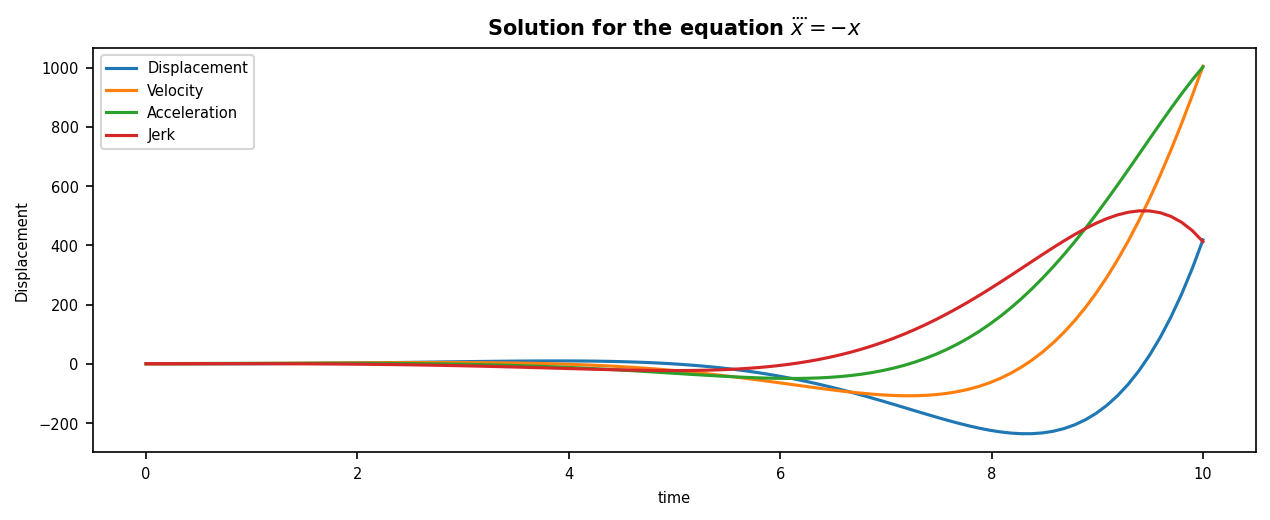

In [30]:
def diff_eqn(t,X):
    x,v,a,j=X
    return [v,a,j,-x]
plot_setup()
tlist=np.linspace(0,10,100)
sol=integrate.solve_ivp(fun=diff_eqn,t_span=[0,10],y0=[0,0,1,1],method="RK45",t_eval=tlist)
plt.plot(tlist,sol.y[0],label="Displacement")
plt.plot(tlist,sol.y[1],label="Velocity")
plt.plot(tlist,sol.y[2],label="Acceleration")
plt.plot(tlist,sol.y[3],label="Jerk")
plt.legend(fontsize=7)
plt.ylabel("Displacement",fontsize=7)
plt.xlabel("time",fontsize=7)
plt.title("Solution for the equation $\\ddddot x= -x$",fontdict=titlefont)
plt.show()